MannwhitneyuResult(statistic=43704947.5, pvalue=6.0376484617779035e-56)


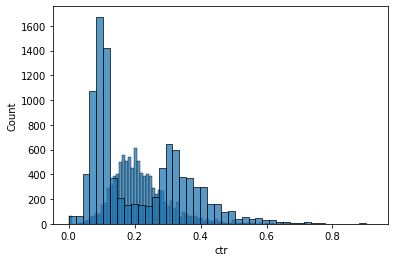

In [11]:
import pandas as pd
import pandahouse as ph
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20220720',
                      'user':'student', 
                      'password':''
                     }


def break_into_groups(n, connection):  #  создать датафреймы для каждой из групп
    q = """
    SELECT exp_group, 
        user_id,
        sum(action = 'like') as likes,
        sum(action = 'view') as views,
        likes/views as ctr
    FROM {db}.feed_actions 
    WHERE toDate(time) between '2022-06-13' and '2022-06-19' 
        and exp_group==%s
    GROUP BY exp_group, user_id
    """ % n
    df = ph.read_clickhouse(q, connection=connection)
    return df


df_2=break_into_groups(2, connection)
df_1=break_into_groups(1, connection)

print(stats.mannwhitneyu(df_2.ctr,df_1.ctr))
groups = sns.histplot(df_1.ctr)
groups = sns.histplot(df_2.ctr)


Не использую t-тест тк распределение ctr во второй двугорбое

Не стоит применять этот алгоритм для всех пользователей, поскольку по результатам теста значительная часть пользователей из второй группы стала ставить меньше лайков